# Important Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
cc=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
cc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
cc.shape

(7043, 21)

In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
cc.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
cc.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
cc.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [9]:
# plt.figure(figsize=(20,10))
# sns.heatmap(cc.corr(),annot=True)

In [10]:
cc.drop(['customerID'],axis=1,inplace=True)

In [11]:
cc.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


# Univariate Analysis

min price : 0
max price: 72


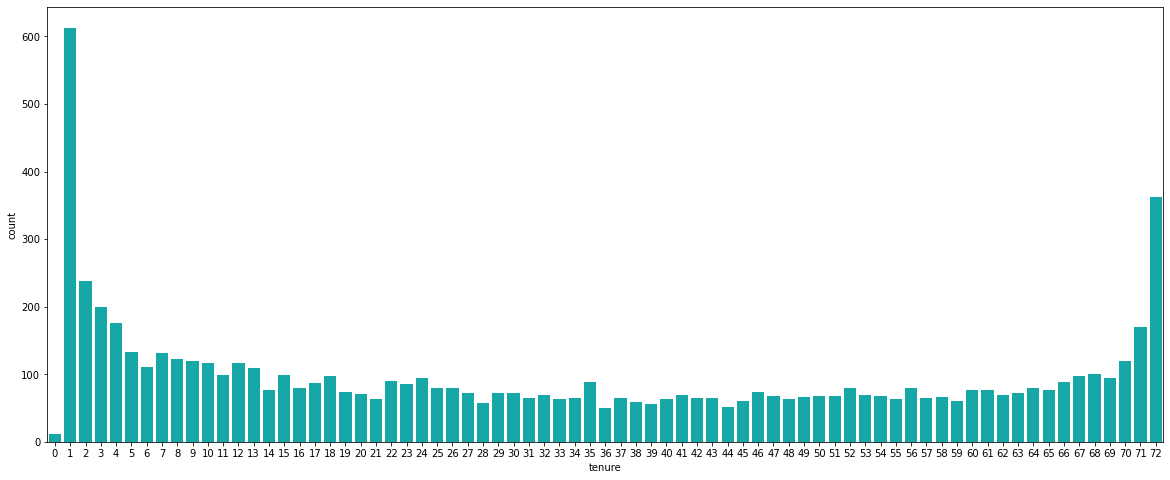

In [12]:
print('min price :',cc['tenure'].min())
print('max price:',cc['tenure'].max())
plt.figure(figsize=(20,8))
sns.countplot(cc['tenure'],color='c')
plt.show()

min price : 18.25
max price: 118.75


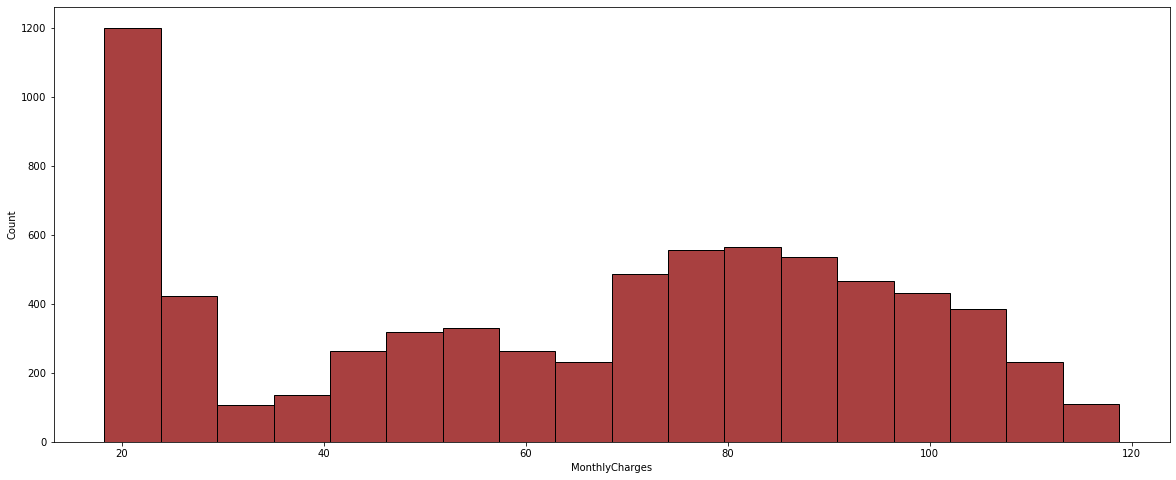

In [13]:
print('min price :',cc['MonthlyCharges'].min())
print('max price:',cc['MonthlyCharges'].max())
plt.figure(figsize=(20,8))
sns.histplot(cc['MonthlyCharges'],color='darkred')
plt.show()

In [14]:
cc['TotalCharges']=pd.to_numeric(cc['TotalCharges'],errors='coerce')

min price : 18.8
max price: 8684.8


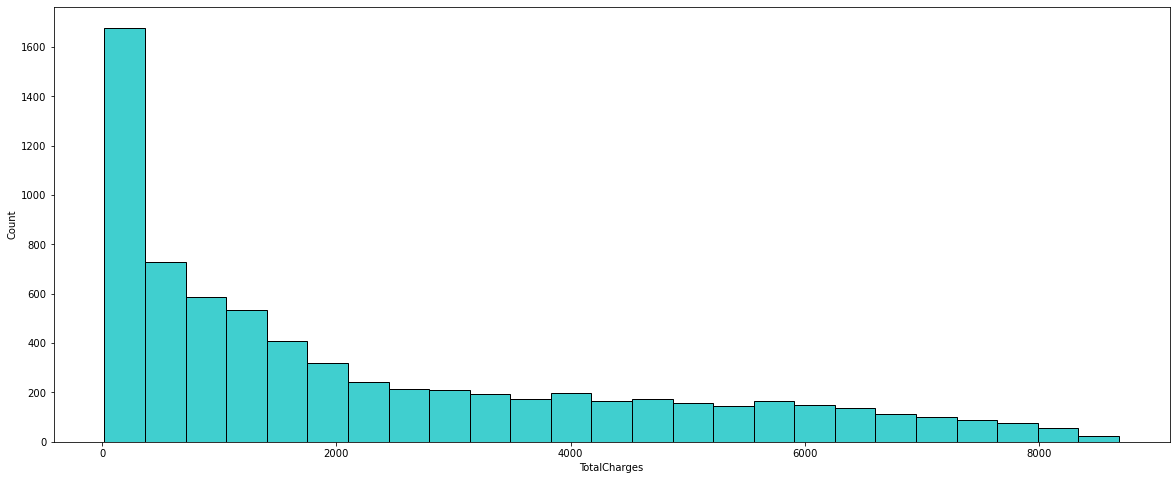

In [15]:
print('min price :',cc['TotalCharges'].min())
print('max price:',cc['TotalCharges'].max())
plt.figure(figsize=(20,8))
sns.histplot(cc['TotalCharges'],color='c')
plt.show()

# Bivariate Analysis:

No     5174
Yes    1869
Name: Churn, dtype: int64

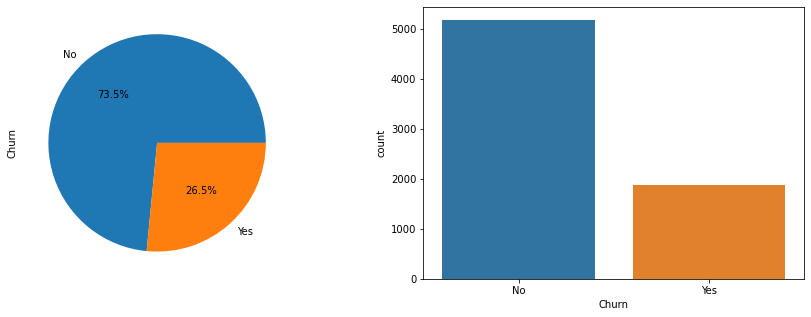

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
cc['Churn'].value_counts().plot.pie(autopct='%1.1f%%')   
plt.subplot(1,2,2)
sns.countplot(cc['Churn'])
cc['Churn'].value_counts()

In [17]:
def group(df,col):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.subplot(1,2,2)
    sns.countplot(df[col],hue='Churn',data=df)
    print(df[col].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64


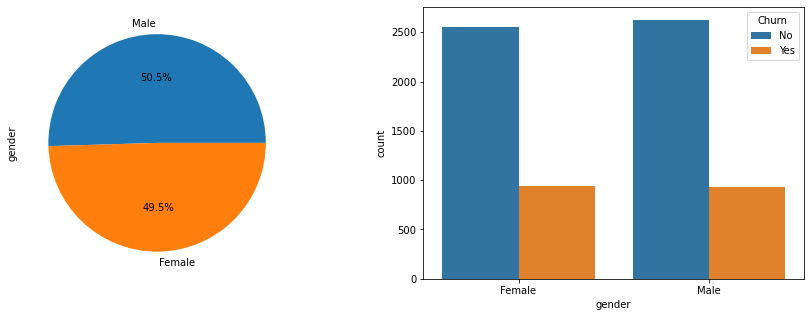

In [18]:
group(cc,'gender')

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


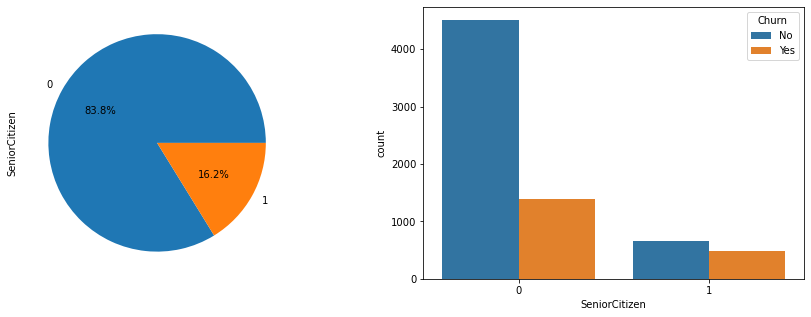

In [19]:
group(cc,'SeniorCitizen')

No     3641
Yes    3402
Name: Partner, dtype: int64


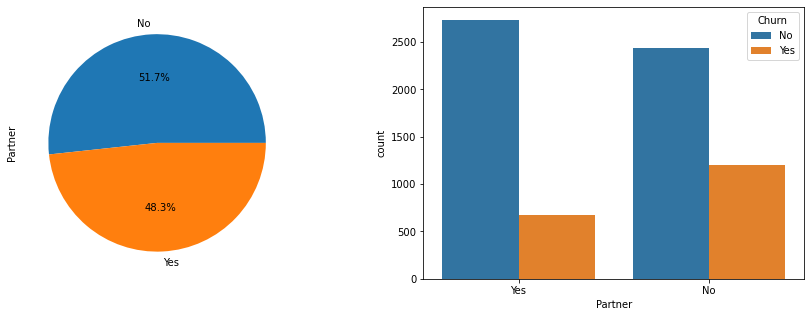

In [20]:
group(cc,'Partner')

No     4933
Yes    2110
Name: Dependents, dtype: int64


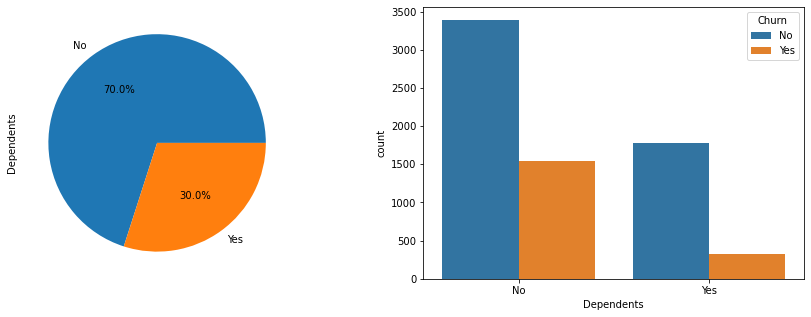

In [21]:
group(cc,'Dependents')

Yes    6361
No      682
Name: PhoneService, dtype: int64


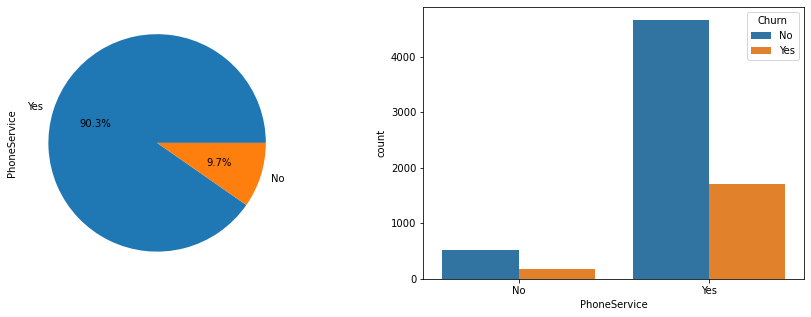

In [22]:
group(cc,'PhoneService')

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


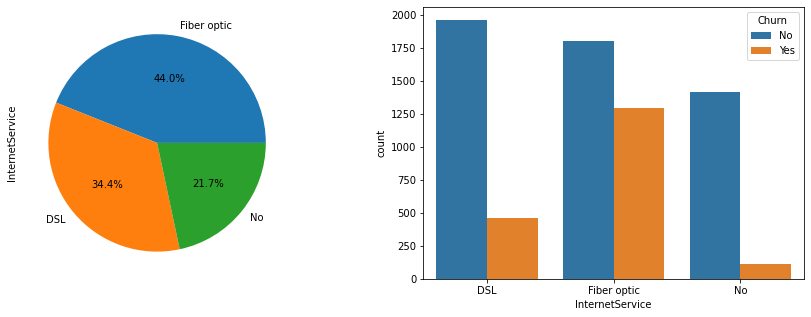

In [23]:
group(cc,'InternetService')

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


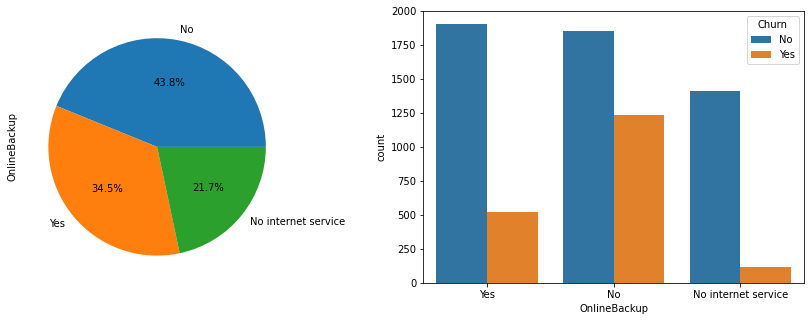

In [24]:
group(cc,'OnlineBackup')#		

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


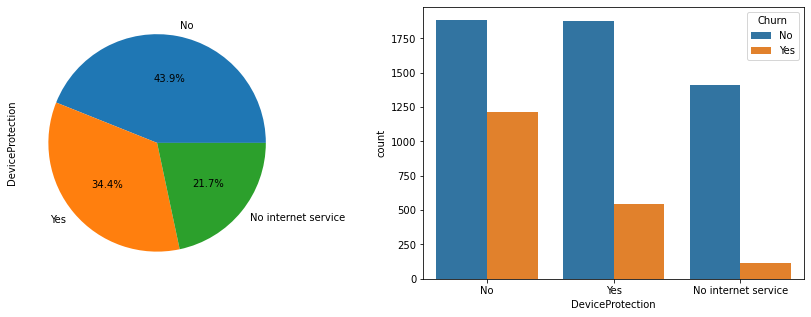

In [25]:
group(cc,'DeviceProtection')

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


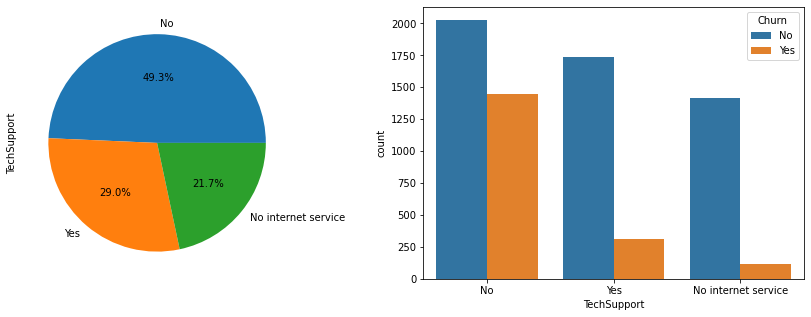

In [26]:
group(cc,'TechSupport')

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


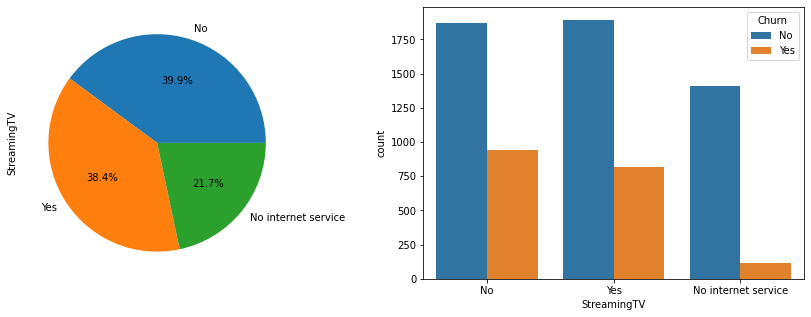

In [27]:
group(cc,'StreamingTV')

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


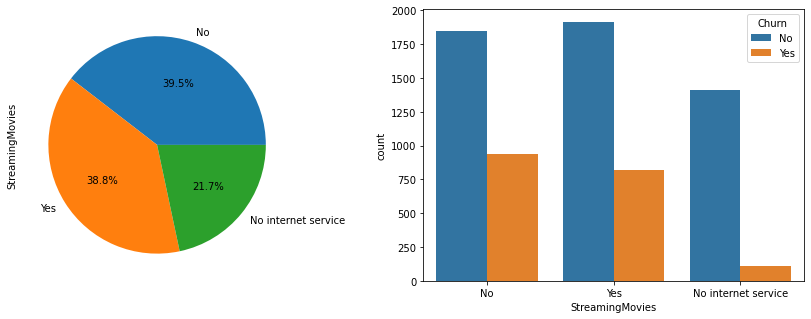

In [28]:
group(cc,'StreamingMovies')

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


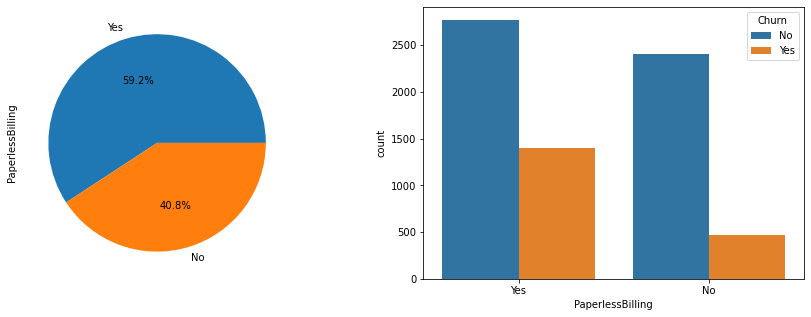

In [29]:
group(cc,'PaperlessBilling')

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


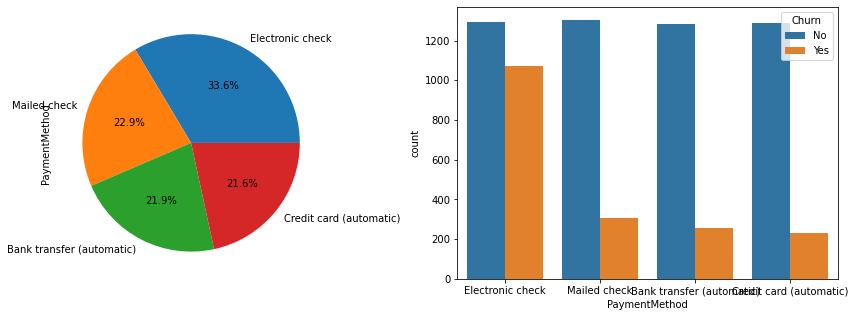

In [30]:
group(cc,'PaymentMethod')

In [31]:
cc_1=cc.select_dtypes(exclude='object')

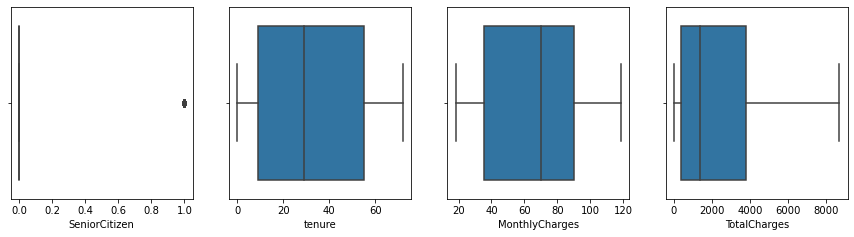

In [32]:
plt.figure(figsize=(15,12))
plot=1
for i in cc_1:
    if plot<=10:
        plt.subplot(3,4,plot)
        sns.boxplot(cc_1[i])
        plt.xlabel(i)
        plot=plot+1
plt.show();

In [33]:
x = cc.drop(columns=['Churn'])
y = cc['Churn']

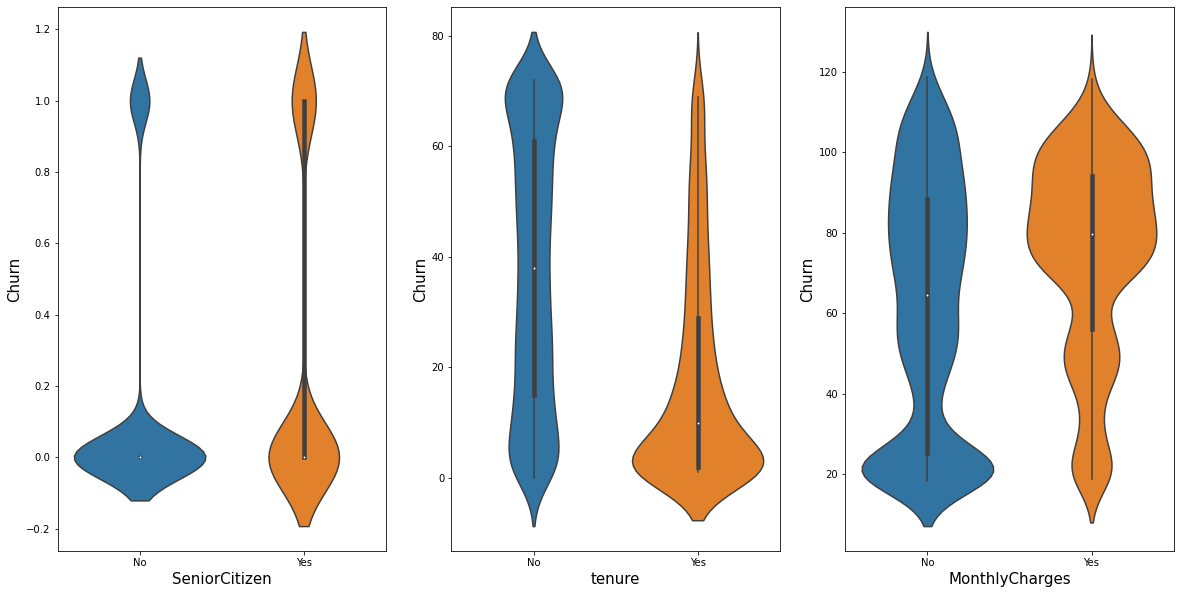

In [34]:
plt.figure(figsize=(20,10))
plot=1
for i in cc_1:
    if plot<=3:
        ax=plt.subplot(1,3,plot)
        sns.violinplot(y,cc_1[i])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Churn',fontsize=15)
        plot+=1
plt.show();

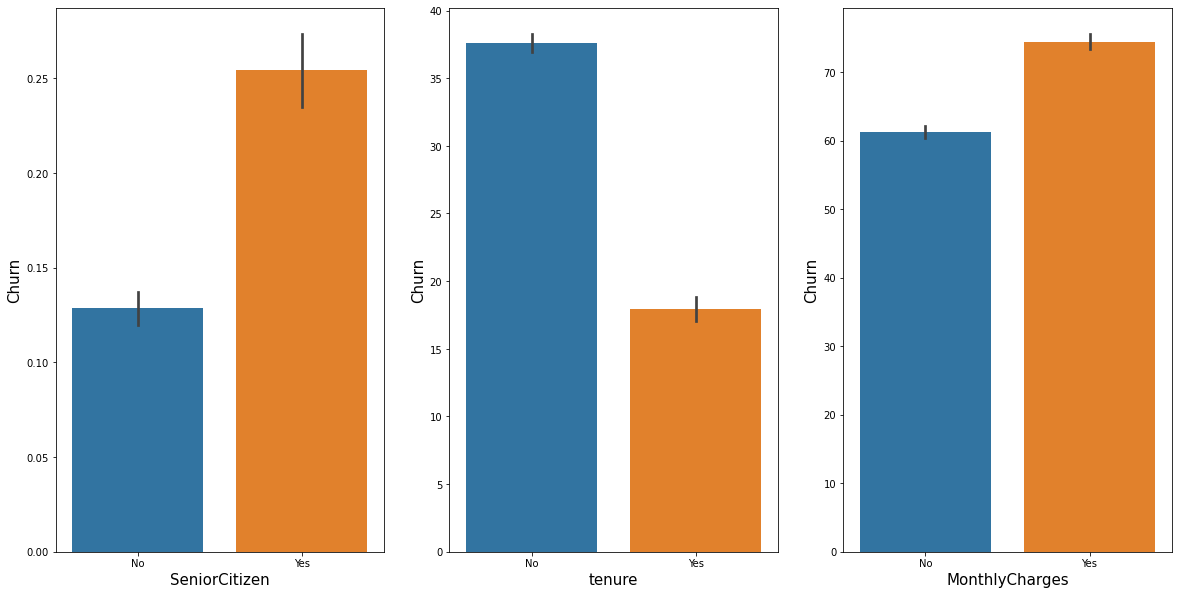

In [35]:
plt.figure(figsize=(20,10))
plot=1
for i in cc_1:
    if plot<=3:
        ax=plt.subplot(1,3,plot)
        sns.barplot(y,cc_1[i])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Churn',fontsize=15)
    plot+=1
plt.show();


In [36]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in cc:
    cc[i] = le.fit_transform(cc[i])

In [37]:
cc['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Correlation Matrix

In [38]:
cc.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.000353,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.105715,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.343056,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,0.085487,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.864756,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.084816,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.444580,0.461992,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.208128,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.247783,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.141258,0.352562,-0.195525


Heatmap

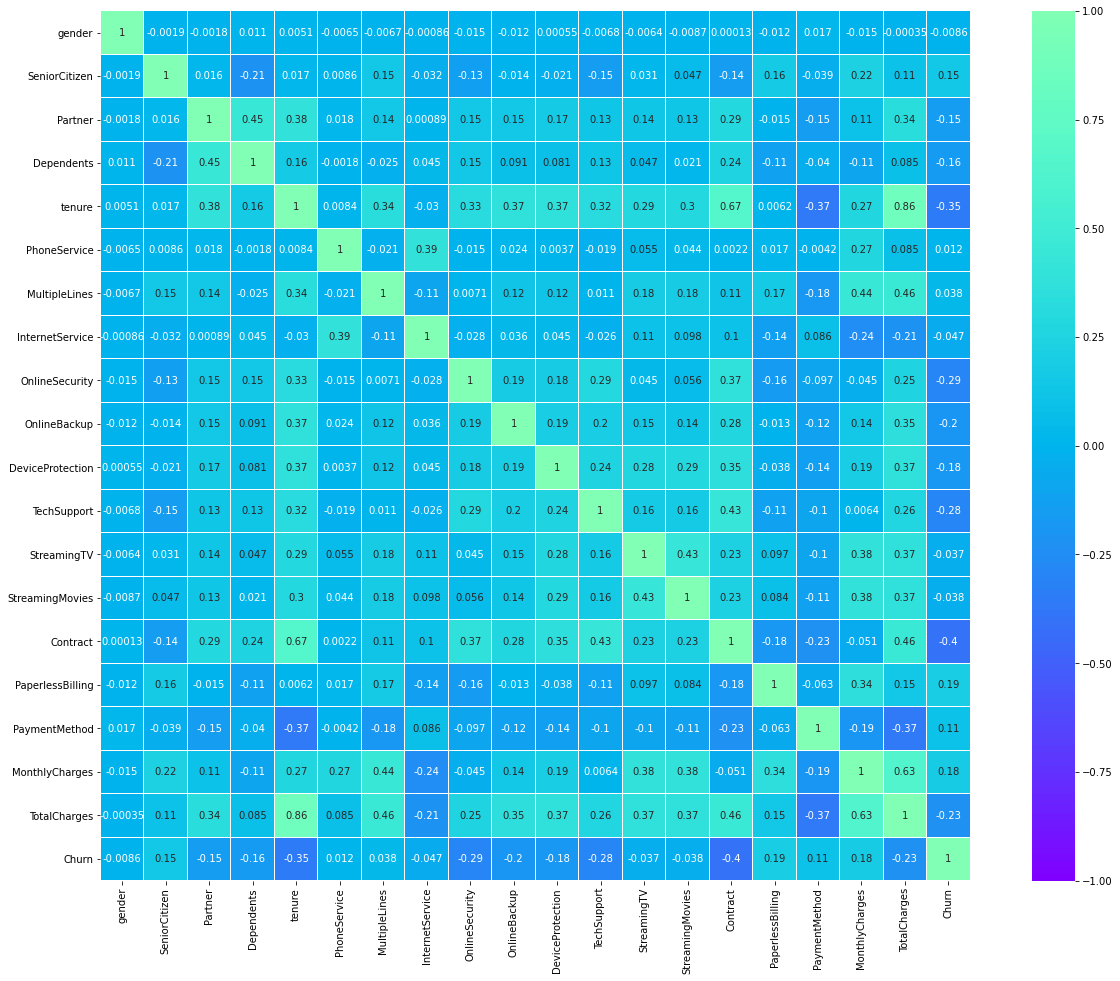

In [39]:
plt.figure(figsize=(22,16))
sns.heatmap(cc.corr(),cbar=True,vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,linewidths=.1,linecolor='white',cmap='rainbow')
plt.show();

In [40]:
cc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


In [41]:
cc1 = pd.get_dummies(cc)
cc1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


In [42]:
corr=cc1.corr()
corr.shape

(20, 20)

# Correlation of target with features

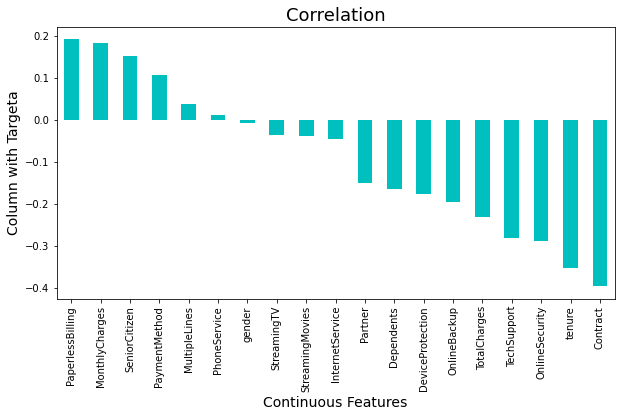

In [43]:
plt.figure(figsize=(10,5))
cc.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Continuous Features',fontsize=14)
plt.ylabel('Column with Targeta',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show();

72


1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

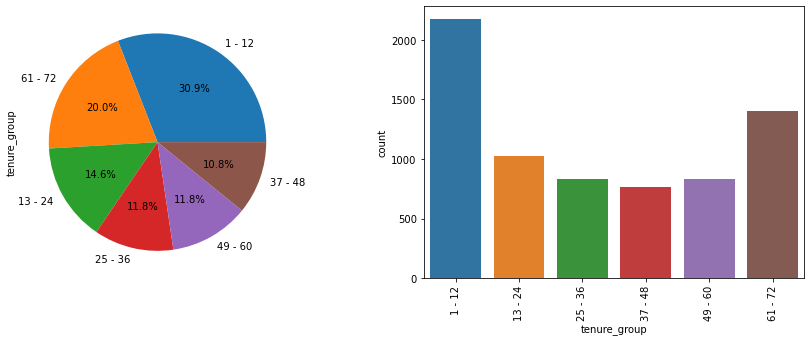

In [44]:
print(cc['tenure'].max()) 
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]  

cc['tenure_group'] = pd.cut(cc.tenure, range(1, 80, 12), right=False, labels=labels)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
cc['tenure_group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(cc['tenure_group'])
plt.xticks(rotation=90)
cc['tenure_group'].value_counts()

In [45]:
main_features=['MonthlyCharges','TotalCharges','tenure','SeniorCitizen']    

from sklearn.preprocessing import PowerTransformer
ptr=PowerTransformer(method='yeo-johnson') 
cc1[main_features]=ptr.fit_transform(cc1[main_features].values)

In [46]:
cc1.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.413099
TotalCharges       -0.331477
Churn               1.063031
dtype: float64

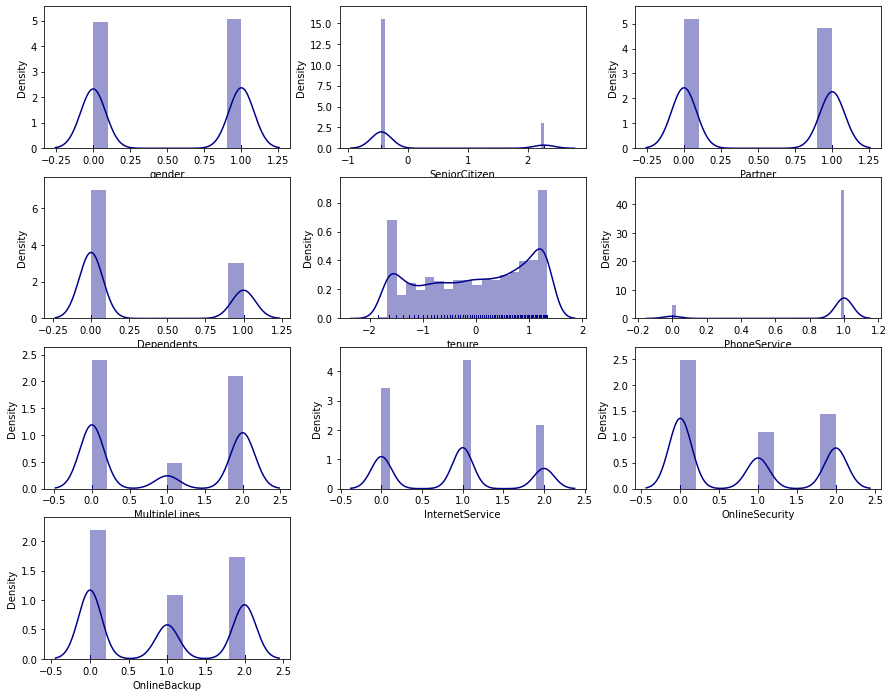

In [47]:
plt.figure(figsize=(15,12))
plot=1
for i in cc1:
    if plot<=10:
        plt.subplot(4,3,plot)
        sns.distplot(cc1[i],rug=True,color='Darkblue')
        plt.xlabel(i)
        plot=plot+1
plt.show();

# Dropping the target variable.

In [48]:
x=cc1.drop(columns=['Churn'])
y=cc1['Churn']

# Satndard Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_value=ss.fit_transform(x)

# Feature Importance:

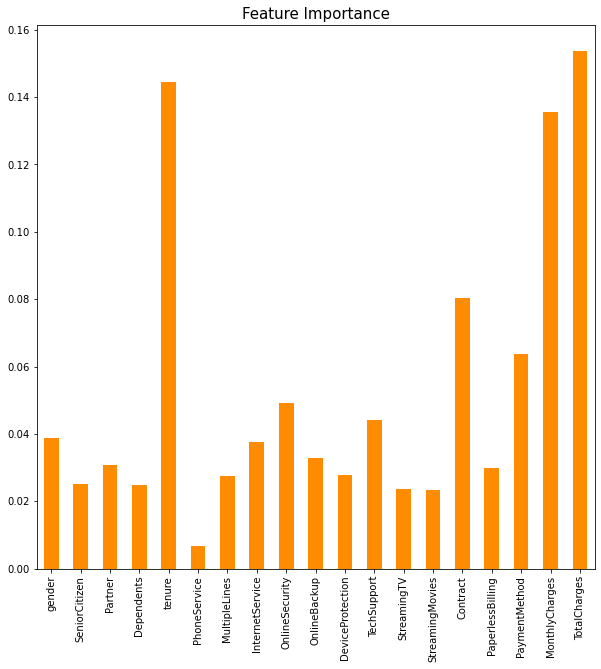

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)
plt.figure(figsize=(10,10))
plt.title('Feature Importance',fontsize=15,)
feature=pd.Series(extra.feature_importances_,index=x.columns)
feature.plot(kind='bar',color='Darkorange')
plt.show();

# Model Creation

In [51]:
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [52]:
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size=.25,random_state=0)

In [53]:
def accuracy(clf,x,y):   
    max_accuracy=0
    for i in range(42,100):
        clf.fit(x_train,y_train)
        pred = clf.predict(x_test)
        accuracy_s = accuracy_score(y_test,pred)
        if accuracy_s > max_accuracy:
            max_accuracy = accuracy_s
            result = i
    
    print('max_accuracy_score',result,'is',max_accuracy*100)
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('Confusion_Matrix',confusion_matrix(y_test,pred))
    print('Classification_Report',classification_report(y_test,pred))
    
    print('Roc_auc_Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    
    
    return result

max_accuracy_score 42 is 79.32992617830777
cross validation score 80.51967062391121
Standard Deviation 0.46108678870571623
Training accuracy 80.8595229079894
Test Accuracy 79.32992617830777
Confusion_Matrix [[1160  138]
 [ 226  237]]
Classification_Report               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1298
           1       0.63      0.51      0.57       463

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.72      1761
weighted avg       0.78      0.79      0.79      1761

Roc_auc_Score 0.7027808191369342





42

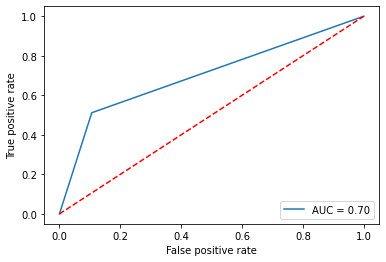

In [54]:
lg=LogisticRegression()
accuracy(lg,x,y)

max_accuracy_score 61 is 73.93526405451448
cross validation score 72.34132040776824
Standard Deviation 1.4866219606868165
Training accuracy 99.73494888299886
Test Accuracy 73.08347529812606
Confusion_Matrix [[1053  245]
 [ 229  234]]
Classification_Report               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1298
           1       0.49      0.51      0.50       463

    accuracy                           0.73      1761
   macro avg       0.65      0.66      0.66      1761
weighted avg       0.73      0.73      0.73      1761

Roc_auc_Score 0.6583238209972478





61

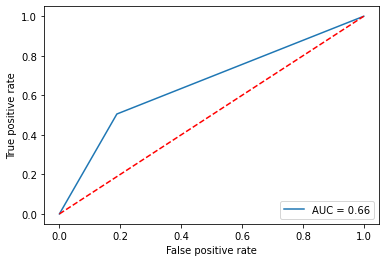

In [55]:
dt=DecisionTreeClassifier()
accuracy(dt,x,y)

max_accuracy_score 42 is 75.58205565019875
cross validation score 76.67202319504484
Standard Deviation 0.9244588351656455
Training accuracy 84.34305187429004
Test Accuracy 75.58205565019875
Confusion_Matrix [[1103  195]
 [ 235  228]]
Classification_Report               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1298
           1       0.54      0.49      0.51       463

    accuracy                           0.76      1761
   macro avg       0.68      0.67      0.68      1761
weighted avg       0.75      0.76      0.75      1761

Roc_auc_Score 0.671104739972112





42

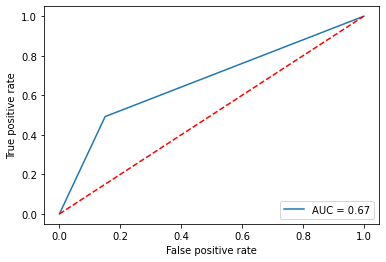

In [56]:
knn=KNeighborsClassifier()
accuracy(knn,x,y)

max_accuracy_score 42 is 78.36456558773425
cross validation score 79.80990709078004
Standard Deviation 0.8182850597493456
Training accuracy 81.91972737599394
Test Accuracy 78.36456558773425
Confusion_Matrix [[1184  114]
 [ 267  196]]
Classification_Report               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1298
           1       0.63      0.42      0.51       463

    accuracy                           0.78      1761
   macro avg       0.72      0.67      0.68      1761
weighted avg       0.77      0.78      0.77      1761

Roc_auc_Score 0.6677493535494048





42

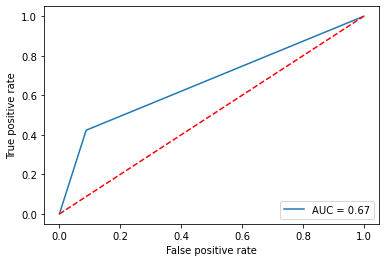

In [57]:
sv=SVC()
accuracy(sv,x,y)

max_accuracy_score 46 is 79.61385576377057
cross validation score 78.83026727530809
Standard Deviation 1.0517472683301599
Training accuracy 99.73494888299886
Test Accuracy 79.1595684270301
Confusion_Matrix [[1156  142]
 [ 225  238]]
Classification_Report               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1298
           1       0.63      0.51      0.56       463

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761

Roc_auc_Score 0.7023199006945393





46

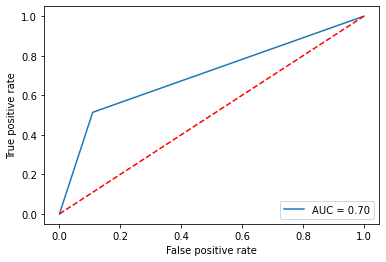

In [58]:
rf=RandomForestClassifier()
accuracy(rf,x,y)

max_accuracy_score 42 is 79.21635434412265
cross validation score 80.37766549454804
Standard Deviation 0.6626100790184394
Training accuracy 81.16243847027641
Test Accuracy 79.21635434412265
Confusion_Matrix [[1141  157]
 [ 209  254]]
Classification_Report               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1298
           1       0.62      0.55      0.58       463

    accuracy                           0.79      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.79      0.79      0.79      1761

Roc_auc_Score 0.7138203982202225





42

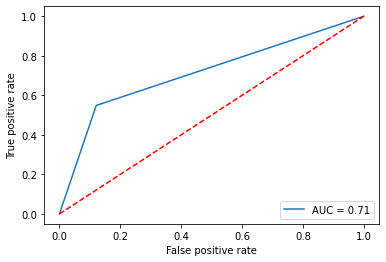

In [59]:
Adb=AdaBoostClassifier()
accuracy(Adb,x,y)

max_accuracy_score 42 is 78.76206700738216
cross validation score 80.60491805922962
Standard Deviation 0.8605032880164424
Training accuracy 83.18818629307081
Test Accuracy 78.76206700738216
Confusion_Matrix [[1158  140]
 [ 234  229]]
Classification_Report               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1298
           1       0.62      0.49      0.55       463

    accuracy                           0.79      1761
   macro avg       0.73      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761

Roc_auc_Score 0.6933710942569894





42

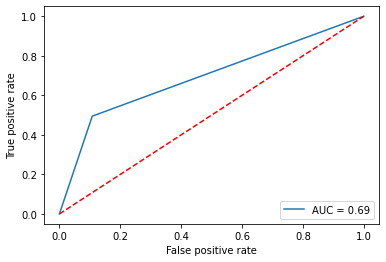

In [60]:
gnb=GradientBoostingClassifier()
accuracy(gnb,x,y)

In [61]:
dt = DecisionTreeClassifier()
grid_param={
       'criterion':['entropy','gini'],
       'max_depth':(10,15),
       'min_samples_split':(10,12),
       'min_samples_leaf':(4,5),
       'max_leaf_nodes':(5,7) }

grd= GridSearchCV(estimator=dt,
                  param_grid=grid_param,
                  cv=5,  
                  n_jobs=-1)
           
            
grd.fit(x_train,y_train)
print('best_params=> ',grd.best_params_)

dt=grd.best_estimator_ 
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

dt_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',dt_conf_mat)
print('Accuracy of dt After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

best_params=>  {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
con_mat=>  
 [[1243   55]
 [ 339  124]]
Accuracy of dt After Hyperparameter Tuning==>  77.62634866553095


# Save the model.

In [62]:
import joblib
joblib.dump(dt,'churn.pkl')

['churn.pkl']

In [63]:
loaded_model=joblib.load('churn.pkl')
prediction=loaded_model.predict(x_test)

In [64]:
prediction

array([0, 0, 0, ..., 0, 0, 0])